## Support Groups MD
#### by Eran Schenker
_____________________________

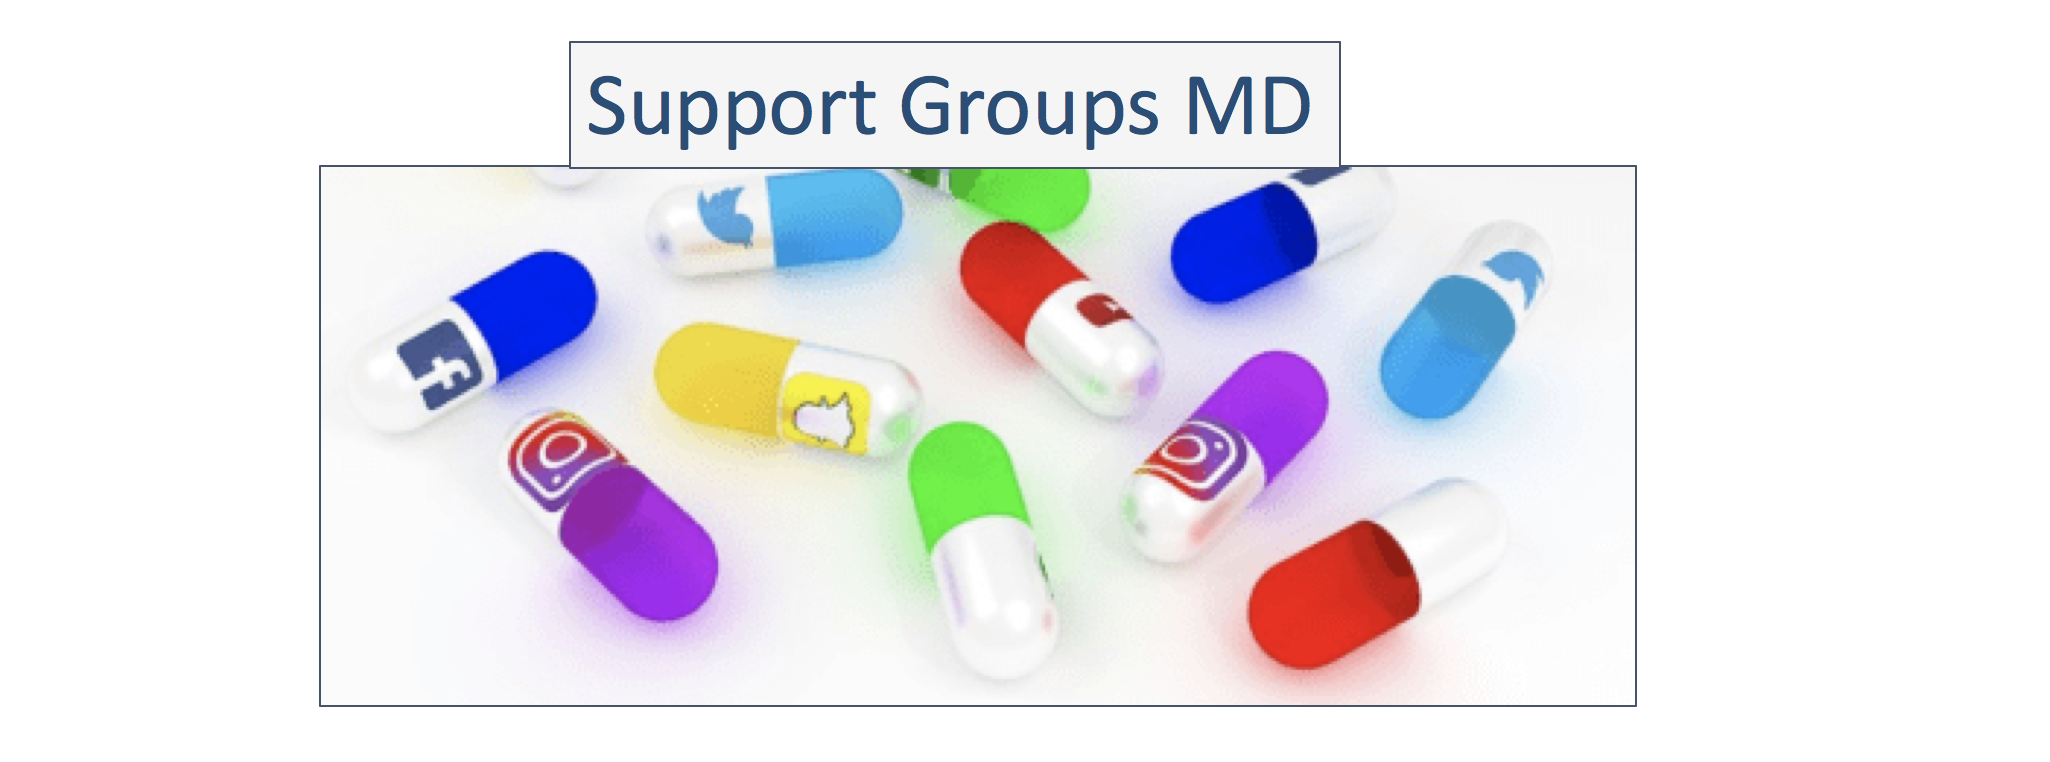

# Introduction
_____________________

## God forbid, 
##### you have a chronic health condition. 
Like everyone else the 1st place you go to, even before the doctor, is sometimes google, and from there on the route is very short to sinking deep into health forums and be overwhelmed in a sea of opinions. Is there a better way to make sense of all of this information?

"Support Group MD", is a project that takes a big step towards the goal of giving you health advice from the cumulative knowledge and experience of thousands of users who are fighting the same health battle. 

The pilot for "Support Group MD" is based on health forums that deal with a specific condition called: “Candida overgrowth”
##### “Candida overgrowth”, 
is a health condition that effects millions, who suffer from numerous symptoms and have no defined and consolidated treatments. This led to the emergence of numerous support forums of users advising each other on what treatment they tried, and what worked for them. The problem is that forums are highly disorganized, users get information overload, and are sometimes left to conduct meticulous research to get even the smallest hint for a potential solution.

So what if we could detect the best treatments that worked, from thousands of user experiences?

The ultimate goal of this project is to build a data base of treatments advised by users (by using NLP methodologies) and try to predict users wellbeing based on this data base (by using Sentiment Analysis and ML classification models).

### Project Outline

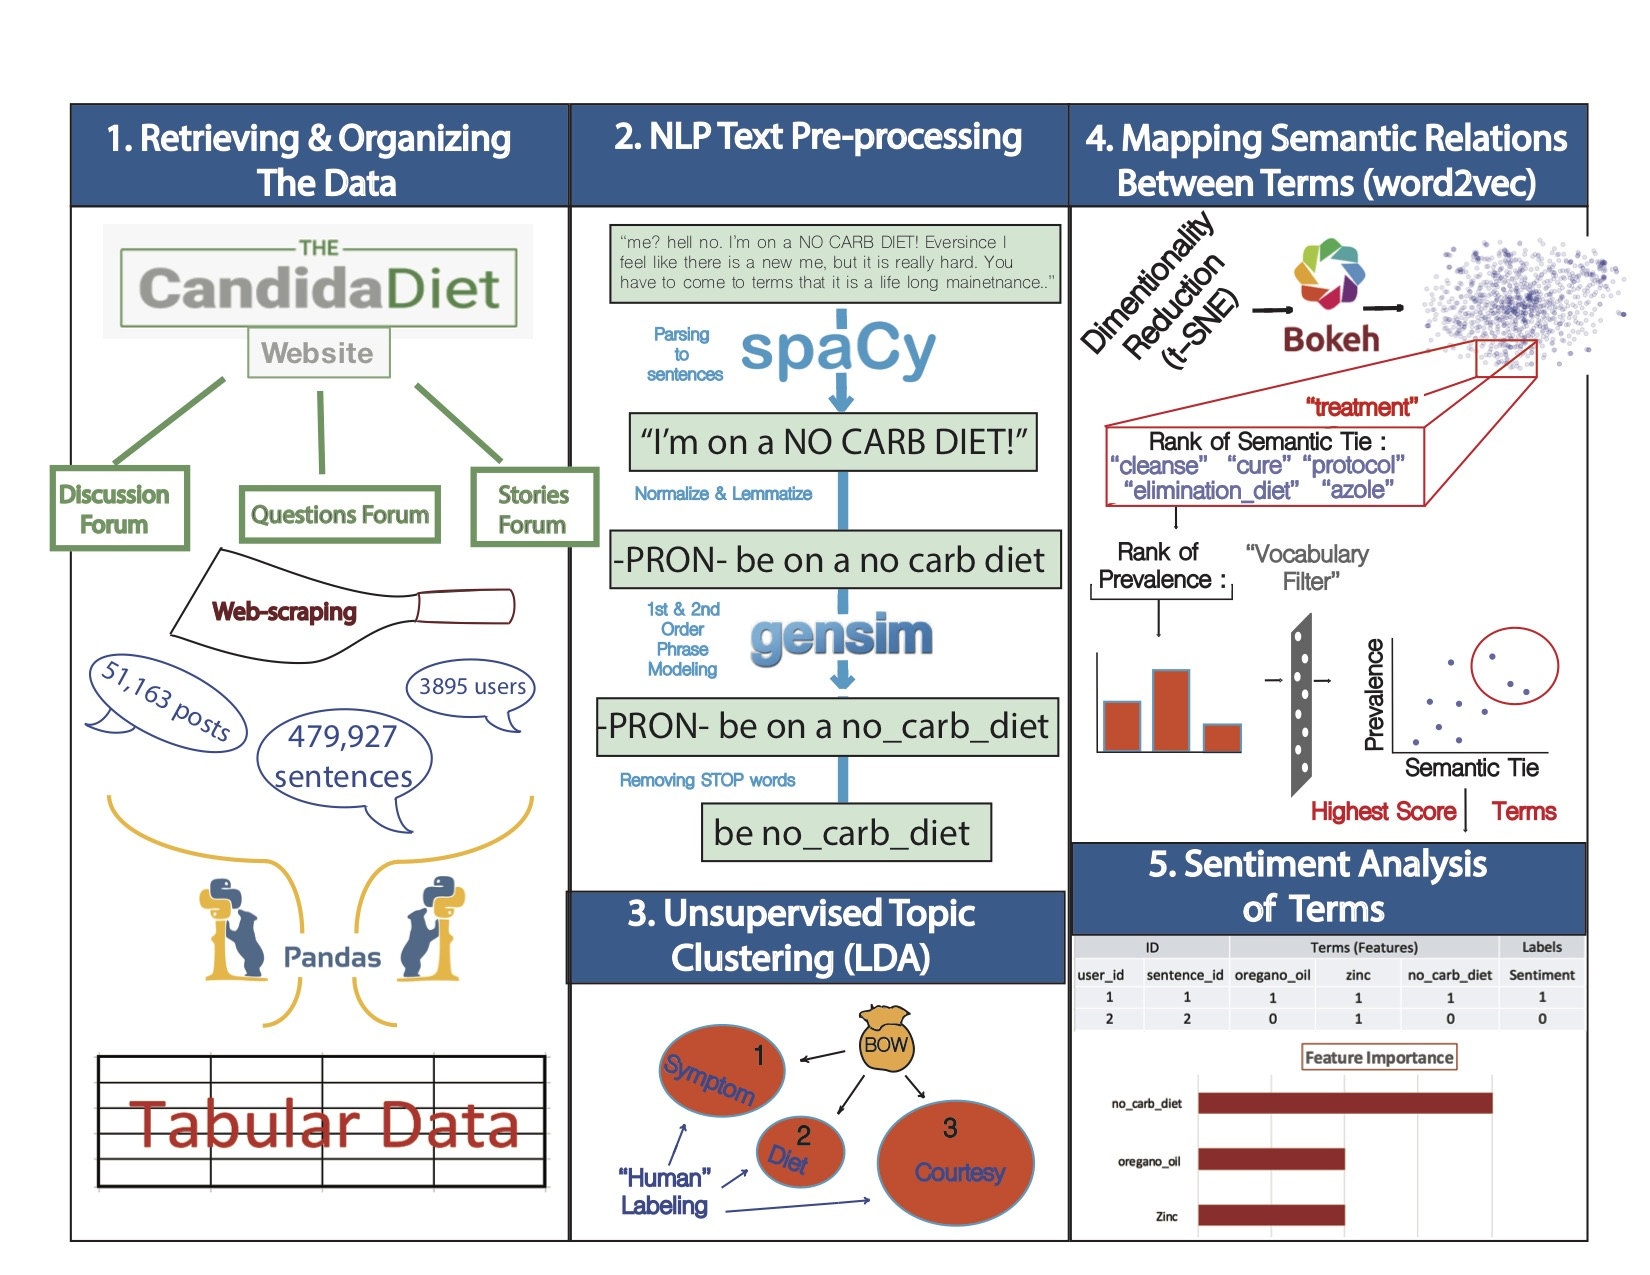

In [9]:
# The following will import functions and variables from a different notebooks. Make the condition True if you want to run it again 
if 1==0:
    %run /Users/eran/Galvanize_more_repositories/Support_group_MD/draft/sents_LDA_word2vec_mash.ipynb

## Project Outline List

#### 1. Blog minning
    a. Webscarping - "The Candida forum", a case study
#### 2. Data processing
    a. General processing
    b. NLP text pre-processing 
#### 3. The Candida Forum Topics:
    a. Unsupervised clustering of corpus (with LDA topic distribution with pyLDAvis)
    b. Topics of Candida sentences - (with sent2topic()) 
#### 4. Semantic relations between Candida words (with word2vec):
    a. Dimentionality reduction and visualization (with bokeh)
    b. Associations with specific word examples (with get_related_terms(u'reaction',12))
    c. Word algebra with specific word combinations (with word_algebra(add=['gut','symptom'],subtract=['cure'],topn=15) (use specific cell))
#### 5. Towards minning of relevant words and then sentences (e.g. to "treatment"):
    a. Topic and Semantic Universe of a word (with ad hoc method: word_profile(word))
#### 6. Work in progress:
    a. Perfecting and using the "word_profile" method to extract relevant words,sentences (e.g. to "treatment")
    b. Sentiment analysis (why should we use it? + initial exploration)
    

## 1. Blog Mining
#### a. webscarping - "The Candida forum", a case study

In [38]:
# The following Data Frame is the Tabular constructed after webscraping and organizing the data: 
TABULAR_DATA=pd.read_csv(joinp(pitch_path,'merged_W_id.csv'))
print('number of rows(posts) =',len(TABULAR_DATA))
TABULAR_DATA.head()

number of rows(posts) = 51163


,Unnamed: 0,user_id,topic_ID,ID_of_post_in_topic,post_ID,post_text
0,0,0,1,0,100,HiIs coconut nectar and coconut butter ok to h...
1,1,1,1,1,101,Not sure about coconut butter. Coconut nectar ...
2,2,0,1,2,102,Thank you! I have not had any reactions to the...
3,3,2,2,0,200,"Ok, so first thing I need to know because I ha..."
4,4,3,2,1,201,"First, wanna say it’s nice to see a post by a ..."


In [88]:
# This is the unit we'll work with - sentences. 
# let's print a sample of a sentence random #350 after parsing the whole tabular data into sentecnes:
sample_sent = get_sample_sent(raw_path,350)
print(sample_sent)

Weeks after my anti-biotic extravaganza I developed IBS, sever allergies, chemical sensitivities, dandruff, Seb Derm, and a long list of other symptoms.


## 2. The Candida Forum Topics:
#### a. Unsupervised clustering of corpus (with LDA topic distribution with pyLDAvis)

In [2]:
with codecs.open(joinp(pilot_path,'ldavis_10'),'rb') as f:  
    LDAvis_prepared_10 = pickle.load(f)
pyLDAvis.display(LDAvis_prepared_10)

In [ ]:
#### b. Topics of Candida sentences - (with sent2topic()) 

In [77]:
#674, #216878,#396878, #39608, #93978
sent2topic(350)

Weeks after my anti-biotic extravaganza I developed IBS, sever allergies, chemical sensitivities, dandruff, Seb Derm, and a long list of other symptoms.


/Users/eran/anaconda3/lib/python3.6/site-packages/gensim/models/phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


[[0, "daily do's and dont's", 0.079000000000000001],
 [1, 'ingredients/supplements', 0.14999999999999999],
 [2, 'admin/courtesy', 0.14999999999999999],
 [3, 'dietary restriction /natural treatment', 0.14999999999999999],
 [4, 'medical problems manifestations', 0.14999999999999999],
 [5, 'pathology / mechanism of action', 0.079000000000000001],
 [7, 'experience / feeling / symptom', 0.079000000000000001],
 [9, 'time', 0.14999999999999999]]

## 3. Semantic relations between Candida words (with word2vec):

#### a. Dimentionality reduction and visualization (with bokeh)

In [79]:
show(tsne_plot)

In [ ]:
#### b. Associations with specific word examples (with get_related_terms())

In [70]:
 ## By typing the word "doctor", we can see the types of doctors users are talking about:
get_related_terms(u'doctor',12)

/Users/eran/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  import sys


,similarity with: doctor
gp,0.826982
doc,0.812519
dr,0.758376
specialist,0.746734
naturopath,0.726649
allergist,0.718856
medical_doctor,0.717978
gynecologist,0.692936
dermatologist,0.691486
ent,0.685814


#### c. Word algebra with specific word combinations (with word_algebra(add=['__','__'],subtract=['__'],topn='__')
    

with word algebra we can explore gut symptoms and "exclude" terms that are related to cure

or vice versa - explore "gut cures" while filtering out terms that are related to symptoms:

In [55]:
print('gut + symptom - cure:')
print('----------------')
word_algebra(add=['gut','symptom'],subtract=['cure'],topn=15)
print('----------------')
#VS
print('gut + cure - symptom:')
print('----------------')
word_algebra(add=['gut','cure'],subtract=['symptom'],topn=15)

gut + symptom - cure:
----------------
gas_bloating
gas
digestive_tract
headache
sympthom
bacteria
system
brain_fog
spasm
extreme_fatigue
bloating
fatigue
bug
ache
numbness
----------------
gut + cure - symptom:
----------------
repopulate
intestine
beneficial_flora
rebuild
restore
reverse
colon
flora
heal
intestinal_lining
healthy_gut_flora
single_most_important
reestablish
friendly_bacteria
eradicate


/Users/eran/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  import sys
/Users/eran/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  import sys


#### 5. Towards minning of relevant words and then sentences (e.g. to "treatment"):
    a. Topic and Semantic Universe of a word (with ad hoc method: word_profile(word))
    
Let's type any word, and get:

##### Table:

'words' - 30 most related terms 

'similarity with: _____' - euclidian distance, of the terms after running word2vec model

'topic_label' - the topics where these 30 terms have the highest rank after running LDA model

'topic_rank' - the actual rank in the topic

'topic_score' - the probability to find the term in that topic (prevalence)
##### Bar plot:

A histogram of the terms count per topic ( how many in each topic)

this will give a sense of how accurate the LDA model is (e.g. we will expect terms related to cure to be in the 'get rid / cure' topic and less in the 'admin / coutesy' topic)

##### scatter plot:

How prevalent vs how related a term is to the word. the more to the right, the stronger the relationship, the higher up the more prevalent in its topic.



/Users/eran/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  import sys


3826 in topic 1 ingredients/supplements
17 in topic 3 dietary restriction /natural treatment
3462 in topic 4 medical problems manifestations
2692 in topic 7 experience / feeling / symptom
168 in topic 3 dietary restriction /natural treatment
51 in topic 3 dietary restriction /natural treatment
77 in topic 3 dietary restriction /natural treatment
62 in topic 3 dietary restriction /natural treatment
316 in topic 9 time
0 in topic 1 ingredients/supplements
29 in topic 3 dietary restriction /natural treatment
4223 in topic 4 medical problems manifestations
3547 in topic 7 experience / feeling / symptom
914 in topic 9 time
4381 in topic 3 dietary restriction /natural treatment
140 in topic 4 medical problems manifestations
104 in topic 1 ingredients/supplements
187 in topic 3 dietary restriction /natural treatment
1811 in topic 9 time
112 in topic 3 dietary restriction /natural treatment
37 in topic 3 dietary restriction /natural treatment
1264 in topic 4 medical problems manifestations
350

/Users/eran/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:342: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  elif is_categorical(y):


,similarity with: antifungal,words,user_label,topic_num,topic_label,topic_rank,topic_score
0,0.852419,anti_fungal,un_labeled,[3],dietary restriction /natural treatment,17,0.009130
1,0.739053,natural_antifungal,un_labeled,[3],dietary restriction /natural treatment,168,0.001104
2,0.684555,oregano_oil,un_labeled,[3],dietary restriction /natural treatment,51,0.003355
3,0.654001,caprylic_acid,un_labeled,[3],dietary restriction /natural treatment,77,0.002633
4,0.647695,nystatin,un_labeled,[3],dietary restriction /natural treatment,62,0.002948
5,0.644776,probiotic,un_labeled,[1],ingredients/supplements,0,0.038569
6,0.638487,gse,un_labeled,[4],medical problems manifestations,140,0.001377
7,0.633338,sf722,un_labeled,[1],ingredients/supplements,104,0.001855
8,0.592230,grapefruit_seed_extract,un_labeled,[3],dietary restriction /natural treatment,112,0.002001
9,0.591600,diflucan,un_labeled,[3],dietary restriction /natural treatment,37,0.004915


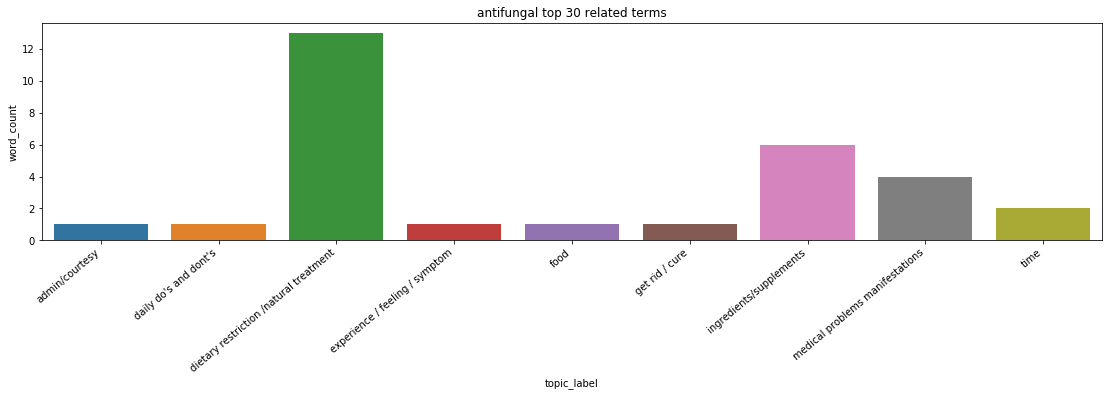

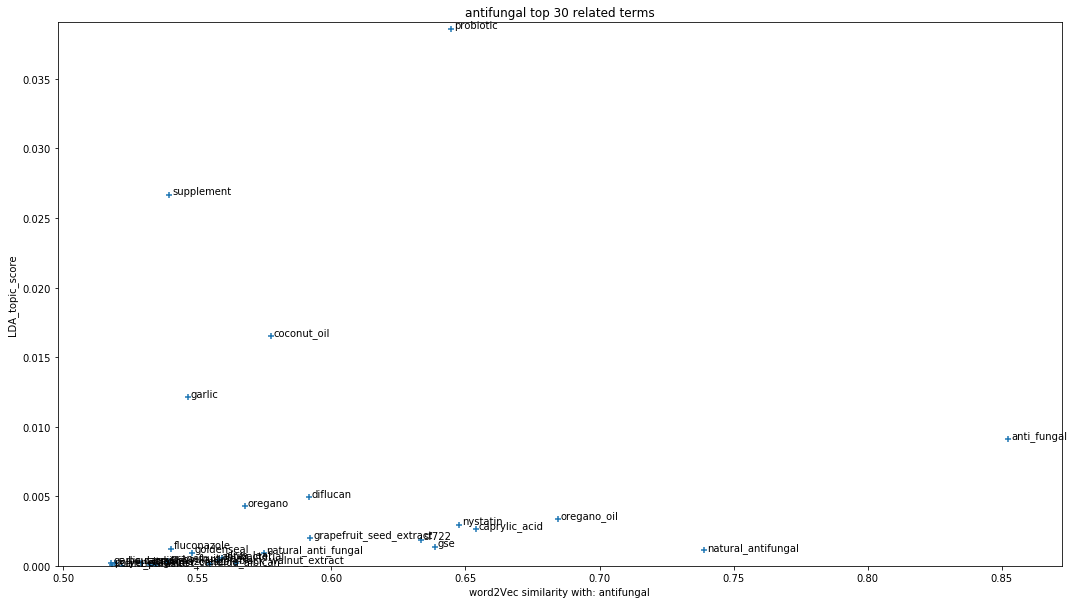

In [92]:
word_profile('antifungal')

## 6. Work in progress:
#### a. Perfecting and using the "word_profile" method to extract relevant words,sentences (e.g. to "treatment")

word profile could be used as folllows:

1. Before using "word_profile()", The BOW of the whole corpus could be filtered with an outside vocabulary

2. A vocabulary of drugs, supplements and ingridients should be used to keep useful entities and filter out general nouns that are not useful like "pill"

3. "word_profile()" can then be used to extract the most relevant and prevalent terms (terms which are not in the vocabulary would be ignored)

4. Sentences consisting with these terms would be kept for further analysis, the rest would be discarded. 

#### b. Sentiment analysis of sentences (why should we use it? + initial exploration)
scheme of plan:

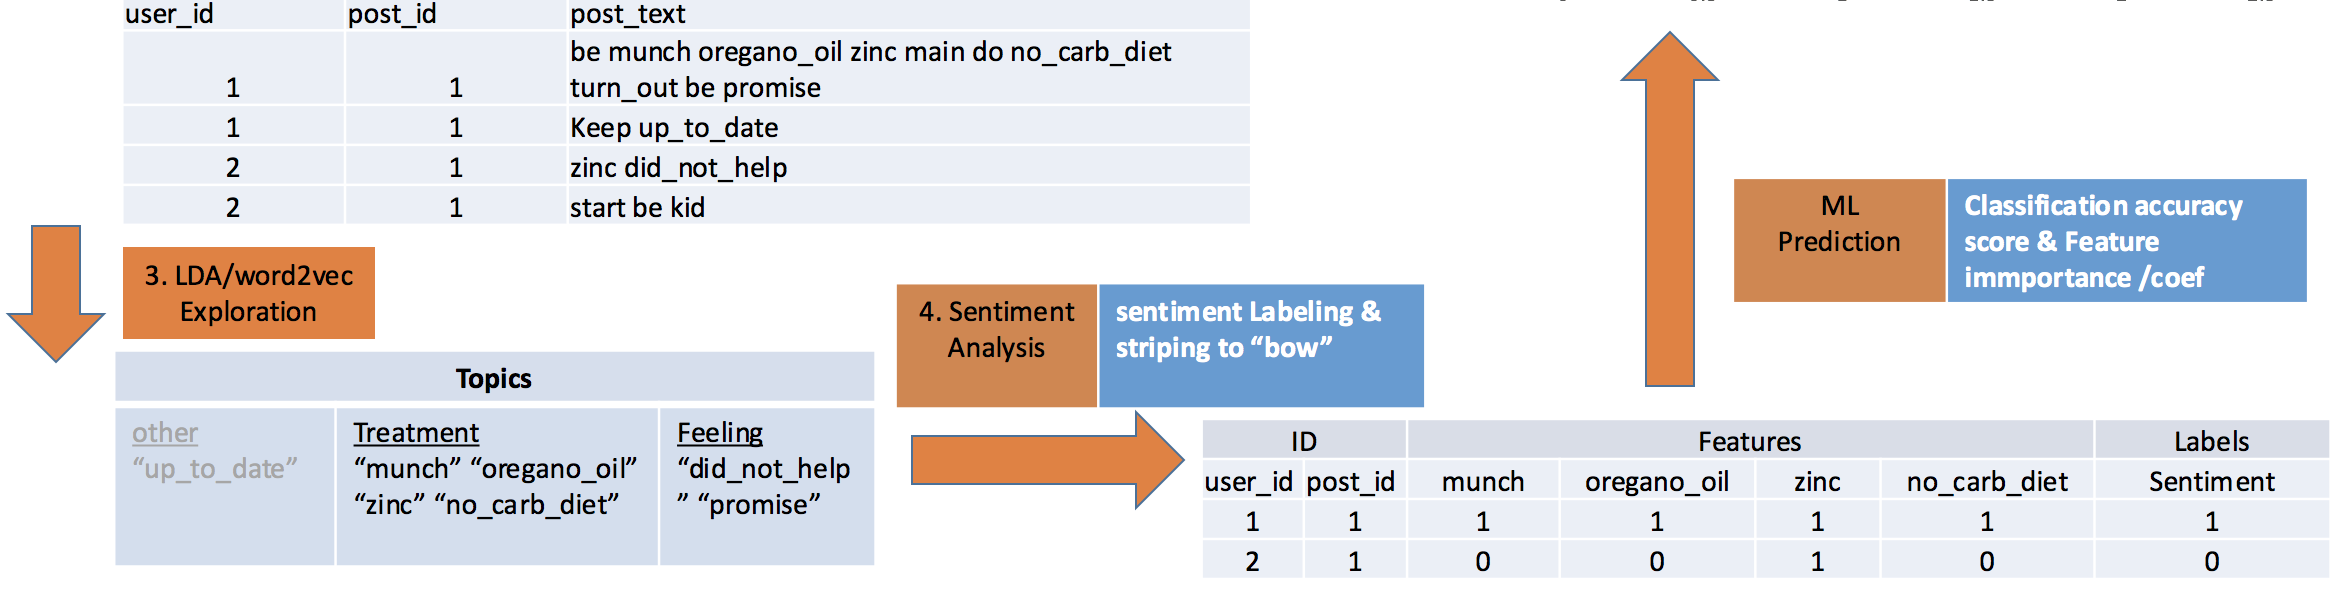

#### Initial exploration conclusions:
##### simple sentiment analysis using a'TextBlob' package showed poor results: 
1. accuracy was low e.g.: "Honey might be another option, as it’s anti-bacterial, but since we’re dealing with a yeast that’s gone wildly out of control, I would think it might be best to avoid even honey at this point. 
 The score for the sentence was positive in a high range (0.55). 

2. The model seems biased towards specific words without considering its content e.g. "Are anti-fungals effective at eliminating candida in the prostate? 0.6" seems biased towards effective. 

3. sentiment analysis might not be the answer to detect useful treatments as advice although could have lower level of sentiment involved.

##### futher attempts at sentiment analysis must be done with the most fitting models out there:

- of sentences and not paragraphs

- of forums which are a dialogue in nature and not a monologue (e.g. reviews)

- of health related.

- neural network on much larger data sets would have the highest potential in showing good results



## Conclusion
NLP models such as LDA and word2vec could be combined to produce powerful understanding of a dialogue based text such as discussion forums about a specific topic dealing with health problems.

word_profile() could be used to "mine" specific terms and give a sense of how important they are in the corpus (their prevalence,topic distribution and the universe of terms they are related to).
by applying word_profile() to symptoms for instance, we could get a sense of the health condition of the users. if I am a user and I type bladder_pain i can see other symptoms that are related (urinary tract and std problems, but also surprisingly prevalent symptom like brain fog. and by typing 'doctor' we can see how people seek naturopath / alternative medicine amongst other specialists in endocrinology, gastrointestinal, dermatologyst and gynecologist. 